In [ ]:
import pandas as pd
from sklearn import tree
import numpy as np

data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf


DecisionTreeClassifier(criterion='entropy')

In [ ]:
X = data[['X_1','X_2']]
y = data.Y

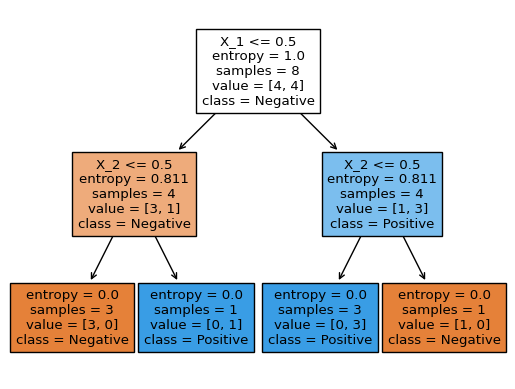

In [ ]:
clf.fit(X,y)

tree.plot_tree(clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True);

[Text(0.5, 0.75, 'Гавкает <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

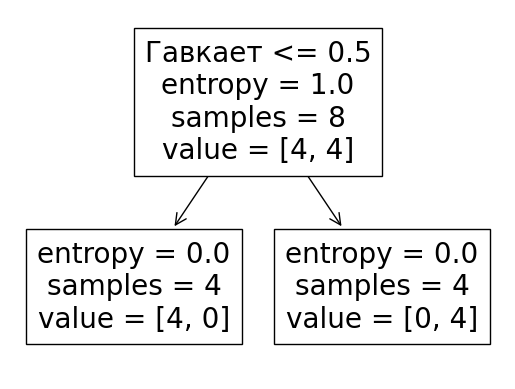

In [ ]:
dogs = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs.csv")
dogs = dogs.drop('Unnamed: 0', axis=1)

dogs_X = dogs.iloc[:, :3]
dogs_y = dogs.iloc[:, 3]

dogs_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
dogs_clf.fit(dogs_X, dogs_y)

tree.plot_tree(dogs_clf, feature_names=dogs_X.columns)

[Text(0.5, 0.75, 'x[2] <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]')]

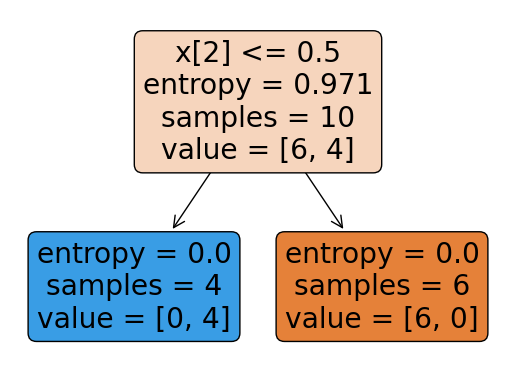

In [ ]:
# Считываем файл c данными о кошках и собаках и сохраняем его в переменную dogs_cats.
dogs_cats = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv')

# Сохраним в отдельные переменные все значения х и у.
X = dogs_cats[['Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = dogs_cats['Вид']

clf = tree.DecisionTreeClassifier(criterion='entropy')

clf.fit(X, y)

tree.plot_tree(clf, rounded=True, filled=True)

In [ ]:

import pandas as pd
from scipy.stats import entropy
import math

base_entropy = -(4/10)*math.log((4/10),2) - (6/10)*math.log((6/10), 2)



def ent(data):
  return entropy(data.Вид.value_counts() / len(data), base=2)

df = dogs_cats
print('Шерстист на 0: ', ent(df[df.Шерстист == 0]))
print('Шерстист на 1: ', ent(df[df.Шерстист == 1]))
print('Гавкает на 0: ', ent(df[df.Гавкает == 0]))
print('Гавкает на 1: ', ent(df[df.Гавкает == 1]))
print('Лазает по деревьям на 0: ', ent(df[df['Лазает по деревьям'] == 0]))
print('Лазает по деревьям на 1: ', ent(df[df['Лазает по деревьям'] == 1]))
print('общая энтропия ', base_entropy)



def ig(data, feature):
  ent0 = ent(data[data[feature] == 0])
  ent1 = ent(data[data[feature] == 1])
  n = len(data)
  n0 = len(data[data[feature] == 0])
  n1 = len(data[data[feature] == 1])
  return ent(data) - ent0 * n0 / n - ent1 * n1 / n

print('IG по шертистости: ', ig(df, 'Шерстист'))
print('IG по голосу: ', ig(df, 'Гавкает'))
print('IG по деревьям: ', ig(df, 'Лазает по деревьям'))

df.Вид.value_counts()


=(an1·(2n1·B) mod P +(an2·(2n2·B) mod P + . . . +(a1·(2·B) mod P +a0·B) mod P)
	. . . mod P) mod P


Вид
котик      6
собачка    4
Name: count, dtype: int64